In [20]:
import datetime
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

%config InlineBackend.figure_format = 'retina'

In [41]:
data_filepath = './data/andorra_covid_cases - Andorra_COVID_cases_data.csv'

df = pd.read_csv(cases_filepath,
                     # parse_dates=['date'],
                      ).fillna(0).sort_index()
df['date'] = pd.to_datetime(df['date'])
df.head()

,timeline event,date,Total cases,Recovered,Active cases,Cases needing Hospital care,Cases in UCI,Deaths
0,Partial confinement. Schools closures and reco...,2020-03-13,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2020-03-14,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2020-03-15,6.0,1.0,5.0,0.0,0.0,0.0
3,0,2020-03-16,14.0,1.0,13.0,0.0,1.0,0.0
4,0,2020-03-17,39.0,1.0,38.0,4.0,1.0,0.0


In [42]:
def prepare_cases(cases):
    new_cases = cases.diff()

    smoothed_new_cases = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    smoothed_new_cases[smoothed_new_cases < 0] = float(0)
    
    cum_cases = cases.rename('cumulative_cases')
    new_cases = new_cases.rename('new_cases')
    smoothed_new_cases = smoothed_new_cases.rename('smoothed_new_cases')
    return cum_cases, new_cases, smoothed_new_cases

start_dt = datetime.date(2020, 3, 15)
end_dt = datetime.date(2020, 5, 3)

cases_df = cases_df[(cases_df['date'] >= start_dt) & (cases_df['date'] <= end_dt)]
cases_df.set_index('date', inplace=True)
cases = cases_df['Total cases']

cum_cases, new_cases, smoothed_new_cases = prepare_cases(cases)
result = pd.concat([cum_cases, new_cases, smoothed_new_cases], axis=1)
result.head()

/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


,cumulative_cases,new_cases,smoothed_new_cases
date,,,
2020-03-15,6.0,NaN,15.0
2020-03-16,14.0,8.0,16.0
2020-03-17,39.0,25.0,16.0
2020-03-18,53.0,14.0,15.0
2020-03-19,75.0,22.0,15.0


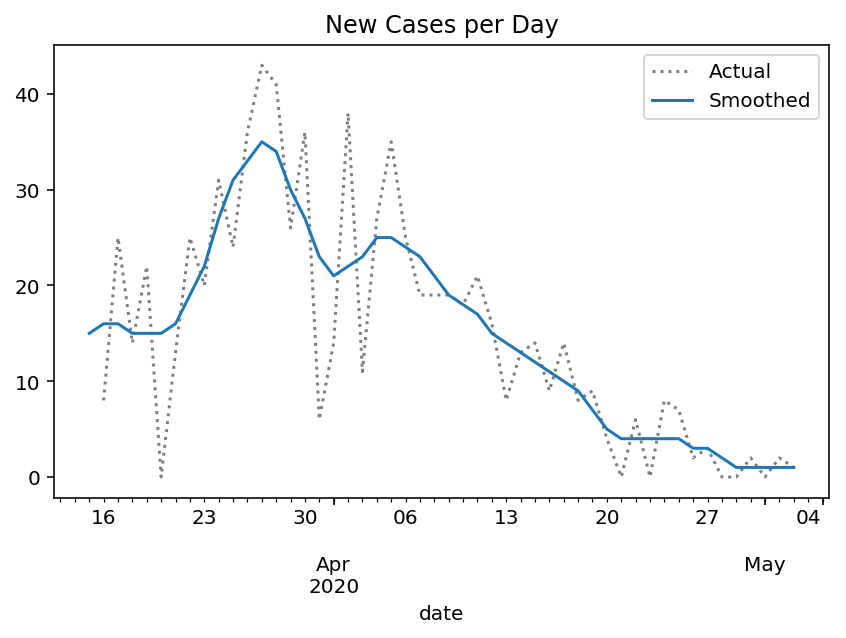

In [43]:
result['new_cases'].plot(title="New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = result['smoothed_new_cases'].plot(label='Smoothed',
                   legend=True)
ax.get_figure().set_facecolor('w')
